In [36]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


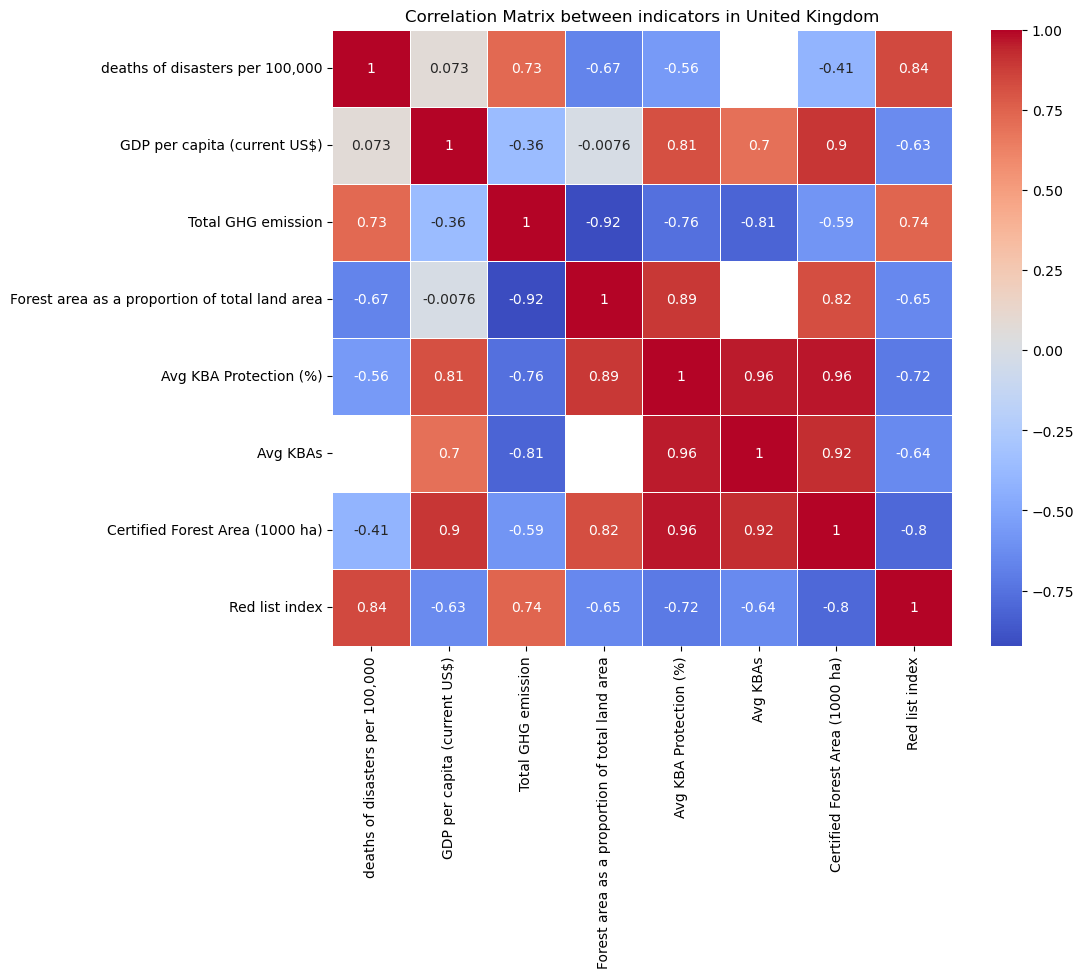

In [37]:
file_path = '/Users/rebeccachen/Desktop/UKdata.csv'
df = pd.read_csv(file_path)

# Filter data for UK
df_UK = df[df['Country'] == 'UK']

# Drop the 'Year' column and keep relevant columns for analysis
predictor_columns = df_UK.drop(columns=['Year'])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor_columns.drop(columns=['Country']))
scaled_df = pd.DataFrame(scaled_data, columns=predictor_columns.drop(columns=['Country']).columns)

# Reordering the columns to match the order you specified
new_column_order = [
    'deaths of disasters per 100,000',
    'GDP per capita (current US$)',
    'Total GHG emission',
    'Forest area as a proportion of total land area',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n',
    'Average proportion of Terrestrial Key Biodiversity Areas (KBAs)',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n',
    'Red list index'
]


# Reorder and rename columns
scaled_df = scaled_df[new_column_order]

scaled_df.rename(columns={
    'Total GHG Emissions/Capita': 'Total GHG Emissions/Capita',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n': 'Avg KBA Protection (%)',
    'Average proportion of Terrestrial Key Biodiversity Areas (KBAs)': 'Avg KBAs',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n': 'Certified Forest Area (1000 ha)'}, 
    inplace=True)

# Calculate the Pearson correlation matrix
correlation_matrix = scaled_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between indicators in United Kingdom')
plt.show()